In [1]:
import random
import numpy as np
import scipy as spy
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt
import time   #用来计算运行时间
#=======模拟数据====================== f(x) = g(x) + h(x)
n = 16              
p, q = 512, 1024          # A的shape=(p,q)
lambd = 0.1              # h前的系数
T =  15                 # 迭代T次


# 生成原始稀疏向量u
np.random.seed(0)
u= spy.sparse.rand(q,1,density=0.1,format='csc',dtype=None)
u1 = u.nonzero()
row = u1[0]
col = u1[1]

data = np.random.randn(int(0.1*q))   # data.shape = 102
u = csc_matrix((data, (row, col)), shape=(q,1)).toarray() # 1024 * 1
    
def prox(x, lambd):
    for i in range(len(x)):
        if np.abs(x[i]) > lambd:
            x[i] = np.sign(x[i]) * (np.abs(x[i]) - lambd)
        else:
            x[i] = 0
    return x


In [2]:
# 生成(y,A)
A = np.random.randn(p, q)
Y = np.dot(A,u)  # a * u, 512 * 1

a = np.zeros((n, int(p/n), q))
y = np.zeros((n, int(p/n), 1))
for i in range(n):
    a[i] = A[int(i*p/n) : int((i+1)*p/n),:]    # a.shape(4,128,1024)
    y[i] = Y[int(i*p/n) : int((i+1)*p/n),:]

T_B

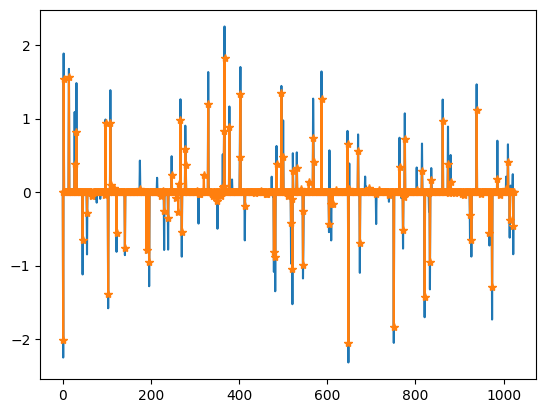

In [3]:
step = 0.0008
# 初始化x
T = 15
seed = 1
np.random.seed(seed)
x0 = (2.0*np.random.random((q,1)) - 1.0)*0.1

t0 = time.time()
xt0 = x0
e_B = np.zeros((1, T))      # ||x-x*||_2^2

for t in range(T):          # 迭代T次
    e_B[0,t] = (np.linalg.norm(xt0-u)**2)/q     # ||x-x*||_2^2 
    g0 = np.dot(xt0.T, np.dot(A.T,A)) - np.dot(Y.T,A)   # 光滑项梯度
    # g0 = g0/np.linalg.norm(g0)
    xt1 = xt0 - step * g0.T
    xt0 = prox(xt1, lambd)
    
t1 = time.time()
t_B = t1 - t0

plt.plot(u)
plt.plot(xt1, "*-")


T_N_pi

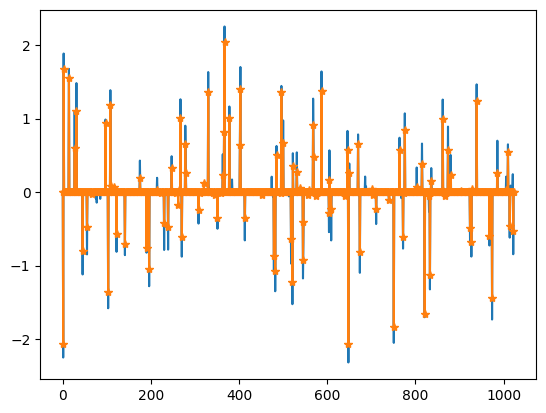

In [4]:
step = 0.0013
T = 15
# 初始化x
seed = 1
np.random.seed(seed)
x0 = (2.0*np.random.random((q,1)) - 1.0)*0.1

t0 = time.time()

xt = x0
e_pi = np.zeros((1,T))      # ||x-x*||_2^2
for t in range(T):          # 迭代T次
    xti = xt
    e_pi[0,t] = (np.linalg.norm(xti-u)**2)/q     # ||x-x*||_2^2
            
    for i in range(n):      # n个(y,A)
        g0 = np.dot(xti.T, np.dot(a[i].T,a[i])) - np.dot(y[i].T,a[i])   # 光滑项梯度
        # g0 = g0/np.linalg.norm(g0)
        xti = xti - step * g0.T
    
    xt = prox(xti, lambd)
    
t1 = time.time()
t_pi = t1 - t0
plt.plot(u)
plt.plot(xt, "*-")

T_N_pit

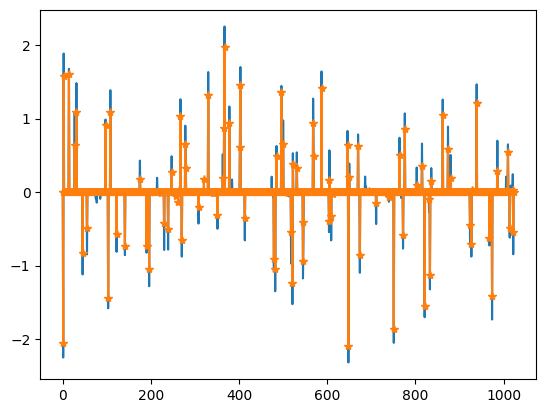

In [5]:
step = 0.0013
# 初始化x
seed = 1
np.random.seed(seed)
x0 = (2.0*np.random.random((q,1)) - 1.0)*0.1

t0 = time.time()

xt = x0
e_pit = np.zeros((1,T))      # ||x-x*||_2^2
for t in range(T):          # 迭代T次
    xti = xt
    e_pit[0,t] = (np.linalg.norm(xti-u)**2)/q     # ||x-x*||_2^2
            
    # (A,y)随机排列
    x = np.arange(0,n)
    random.shuffle(x)
    A_ = np.zeros_like(a)
    y_ = np.zeros_like(y)
    for m in range(len(a)):
        A_[m] = a[x[m]]
        y_[m] = y[x[m]]      
            
            
    for i in range(n):      # n个(y,A)
        g0 = np.dot(xti.T, np.dot(A_[i].T,A_[i])) - np.dot(y_[i].T,A_[i])   # 光滑项梯度
        # g0 = g0/np.linalg.norm(g0)
        xti = xti - step * g0.T
    
    xt = prox(xti, lambd)
    
t1 = time.time()
t_pit = t1 - t0
plt.plot(u)
plt.plot(xt, "*-")

SPG

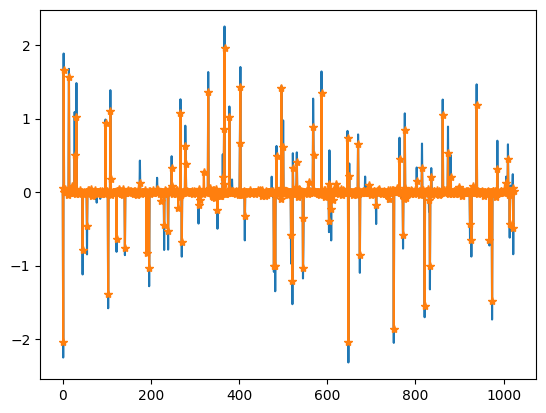

In [6]:
step = 0.0017
# 初始化x
seed = 1
np.random.seed(seed)
x0 = (2.0*np.random.random((q,1)) - 1.0)*0.1
lambd2 = lambd/n
t0 = time.time()

xt = x0
e_spg = np.zeros((1,T))      # ||x-x*||_2^2

for t in range(T):          # 迭代T次
    xti = xt
    e_spg[0,t] = (np.linalg.norm(xti-u)**2)/q     # ||x-x*||_2^2
        
            
    for i in range(n):      # n个(y,A)
        r = random.randint(0, n-1)
        g0 = np.dot(xti.T, np.dot(a[r].T,a[r])) - np.dot(y[r].T,a[r])   # 光滑项梯度
        xti = xti - step * g0.T
        xti = prox(xti, lambd2)
    
    xt = xti
    
    
t1 = time.time()
t_spg = t1 - t0
plt.plot(u)
plt.plot(xt, "*-")

ADMM_T_n

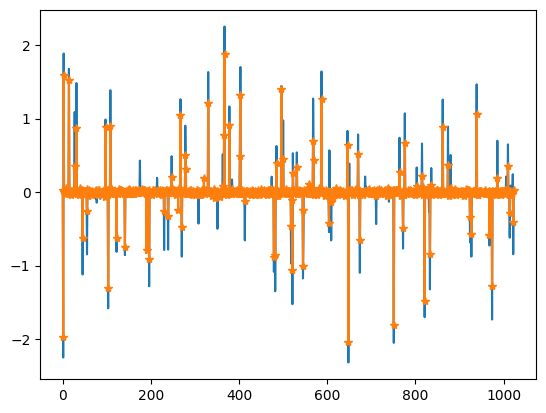

In [7]:
rho = 10

# 初始化x
seed = 8
np.random.seed(seed)
x0 = (2.0*np.random.random((q,1)) - 1.0)*0.1

e_ADMM = np.zeros((n,T))      # ||x-x*||_2^2
t0 = time.time()
x = x0

z = x
w = np.random.rand(q,1)     # (1024,1)
E = np.identity(q)

for t in range(T):
    # print(t)
    for i in range(n):
        e_ADMM[i,t] = (np.linalg.norm(x-u)**2)/q     # ||x-x*||_2^2
        x = np.dot(np.linalg.inv(np.dot(a[i].T, a[i]) + rho*E),(np.dot(a[i].T,y[i]) + rho*(z - w)))
        z = prox(x + w, lambd/rho)
        w = w + x - z
        
t1 = time.time()
t_ADMM = t1 - t0
plt.plot(u)
plt.plot(x, "*-")

In [8]:
# plt.plot(e_B[0],'--',label='T-B')
# plt.plot(e_pi[0],'^-',label='pi')
# plt.plot(e_pit[0],label='pit')
# # plt.plot(e_N_T,label='n-T')
# plt.plot(e_ADMM[0],'*-',label='ADMM')
# plt.legend()
# # plt.title('Convergence of algorithms with no error')
# plt.xlabel('Iteration number')
# plt.ylabel('Relative error')
# print('time:B,pi,pit,ADMM:', t_B, t_pi, t_pit, t_ADMM)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


time:B,pi,pit,ADMM,SPG: 0.2413318157196045 2.0093135833740234 2.1152892112731934 32.515894412994385 4.349908113479614


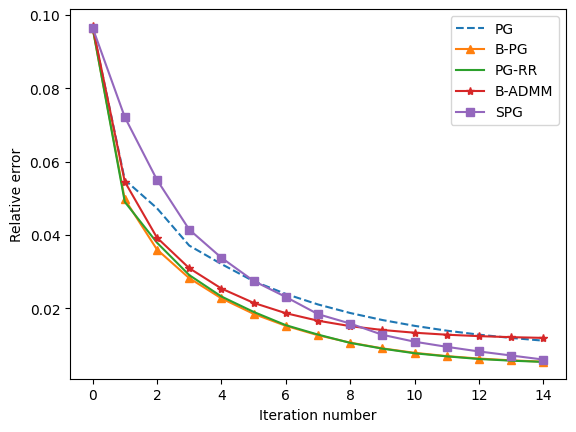

In [9]:
plt.plot(e_B[0],'--',label='PG')
plt.plot(e_pi[0],'^-',label='B-PG')
plt.plot(e_pit[0],label='PG-RR')
# plt.plot(e_N_T,label='n-T')
plt.plot(e_ADMM[0],'*-',label='B-ADMM')
plt.plot(e_spg.T,'s-',label='SPG')
plt.legend()
# plt.title('Convergence of algorithms with no error')
plt.xlabel('Iteration number')
plt.ylabel('Relative error')
print('time:B,pi,pit,ADMM,SPG:', t_B, t_pi, t_pit, t_ADMM, t_spg)
plt.savefig('./e0.eps', format='eps', dpi=1000)